#  Introducción a la Regresión Lineal y sus Limitaciones

La **regresión lineal** es una de las técnicas más fundamentales y utilizadas en el análisis predictivo. Su objetivo principal es modelar la relación entre una variable dependiente \(y\) y una o más variables independientes \(X\).

## 📘 ¿Cómo funciona la regresión lineal?
Busca encontrar una línea (o hiperplano en múltiples dimensiones) que minimice el error cuadrático entre los valores reales y los valores predichos:

$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon$

- $\beta_0$: intercepto (término independiente)
- $\beta_j$: coeficiente de la variable $X_j$ para $j = 1, 2, \ldots, p$
- $X_j$: variable predictora $j$
- $\epsilon$: error aleatorio (ruido)
- $y$: variable dependiente (respuesta)

Se estima usando el criterio de **mínimos cuadrados ordinarios** (OLS), minimizando:

$\sum_{i=1}^n (y_i - \hat{y}_i)^2$


## ⚠️ Limitaciones de la regresión lineal

A pesar de su simplicidad, la regresión lineal puede presentar varios problemas:

### 1. **Multicolinealidad**
Cuando las variables predictoras están altamente correlacionadas entre sí, los coeficientes \(\beta\) pueden volverse inestables y muy sensibles a pequeños cambios en los datos.

### 2. **Sobreajuste (Overfitting)**
Si el modelo tiene demasiadas variables o se ajusta demasiado a los datos de entrenamiento, puede generalizar mal en nuevos datos.

### 3. **Coeficientes grandes**
En presencia de multicolinealidad o ruido, los coeficientes pueden tomar valores muy altos, lo que produce modelos difíciles de interpretar.

### 4. **No hay control sobre la complejidad**
El modelo trata de minimizar el error sin ninguna penalización por usar muchos o grandes coeficientes.

# 💡 Solución: Regularización
Para superar estas limitaciones, se introducen técnicas como **regresión Ridge** y **regresión Lasso**, que incorporan un término de **penalización** para controlar la complejidad del modelo. Estas técnicas ayudan a reducir el sobreajuste y a manejar mejor los datos correlacionados.

👉 En la siguiente sección, exploraremos en profundidad la **regresión Ridge**, sus fundamentos teóricos, su implementación y su aplicación práctica sobre datos reales.


# Regresión Ridge

### ¿Qué es la regresión Ridge?
La **regresión Ridge** es una versión modificada de la regresión lineal clásica. Su objetivo principal es **mejorar la capacidad de generalización del modelo**, especialmente cuando hay muchas variables o alta correlación entre ellas (multicolinealidad).

En lugar de solo minimizar el error de predicción, Ridge añade una **penalización** para evitar que los coeficientes crezcan demasiado.

### ¿Qué es el sobreajuste (Overfitting)?
El **sobreajuste** ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido o los patrones irrelevantes. Como consecuencia:
- El error en entrenamiento es bajo.
- El error en nuevos datos (test) es alto.

El sobreajuste suele darse cuando:
- Hay muchas variables predictoras.
- Existe multicolinealidad.
- El modelo es muy flexible y se adapta demasiado.

### ¿Qué es una penalización?
Una **penalización** o **regularización** es un mecanismo para evitar el sobreajuste. Agrega un término extra a la función de error que **castiga a los coeficientes grandes**.

Esto obliga al modelo a encontrar soluciones más simples, con coeficientes pequeños, que tienden a generalizar mejor.

### Penalización en Ridge: L2
La regresión Ridge utiliza la **penalización L2**, es decir, penaliza la **suma de los cuadrados** de los coeficientes:

$\text{Costo Ridge} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2$

- El primer término es el error de predicción (como en la regresión lineal).
- El segundo término es la penalización L2.
- $(\alpha)$: parámetro de regularización que **controla cuánto peso se le da a la penalización**.

### ¿Cómo funciona el parámetro $(\alpha)$?
El parámetro ($\alpha$) (también llamado lambda) es **clave en Ridge**:
- Si ($\alpha$ = 0\), no hay penalización: se comporta como una regresión lineal normal.
- Si $(\alpha)$ es muy grande, los coeficientes tienden a acercarse a cero, y el modelo puede infraajustar.

👉 **Se debe encontrar un punto intermedio.**

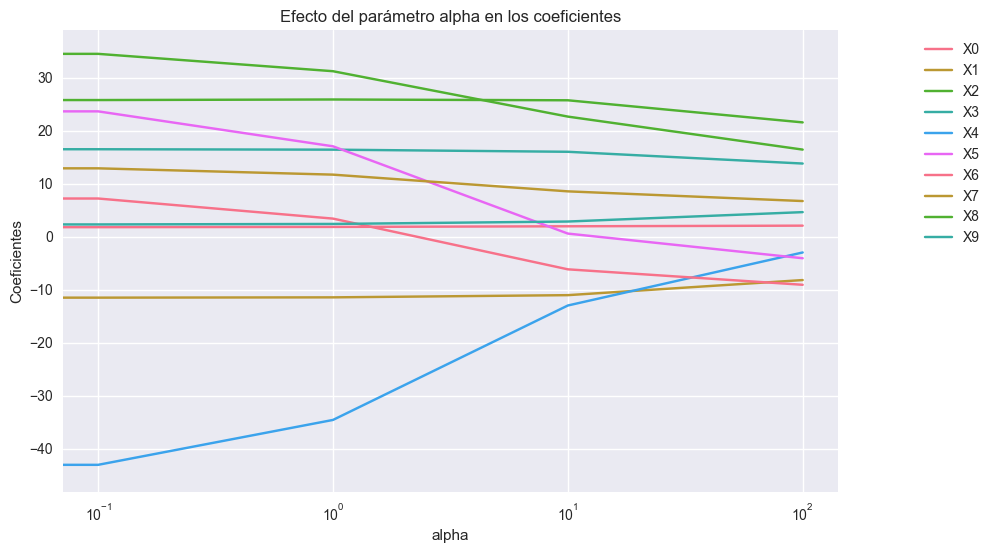

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset
X, y = load_diabetes(return_X_y=True)

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluar coeficientes para diferentes alphas
alphas = [0, 0.1, 1, 10, 100]
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Visualizar el efecto del parámetro alpha
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, [coef[i] for coef in coefs], label=f"X{i}")

plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("Coeficientes")
plt.title("Efecto del parámetro alpha en los coeficientes")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

Variables seleccionadas:
X1: BMI
X2: BP
X3: S5

Dataset: 442 muestras, 3 variables


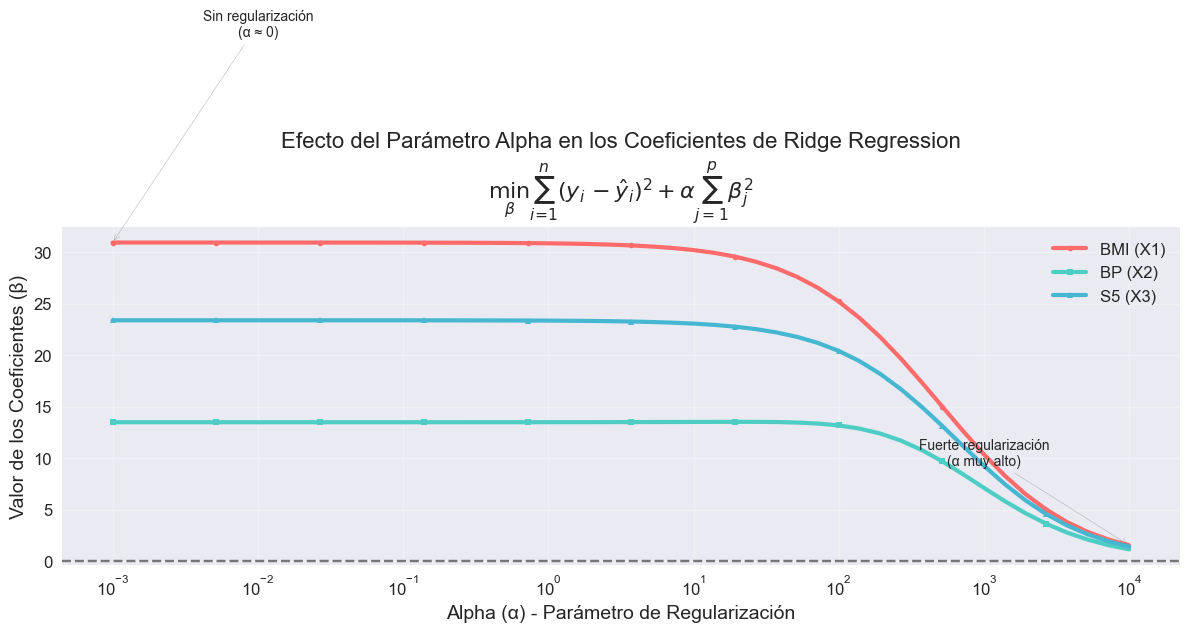


EFECTO DEL ALPHA EN LOS COEFICIENTES
Alpha muy bajo (0.0010) - Sin regularización:
  BMI:   30.947
  BP:    13.504
  S5:    23.401

Alpha muy alto (10000) - Fuerte regularización:
  BMI:    1.557
  BP:     1.162
  S5:     1.433

Reducción de los coeficientes:
  BMI: 95.0%
  BP: 91.4%
  S5: 93.9%

📉 A medida que α aumenta, todos los coeficientes se acercan a CERO
🎯 Esto es el efecto de 'encogimiento' (shrinkage) de Ridge Regression


In [20]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
diabetes = load_diabetes()
X_full, y = diabetes.data, diabetes.target

# Seleccionar solo 3 variables más relevantes
X = X_full[:, [2, 3, 8]]  # BMI, BP, S5
selected_features = ['BMI', 'BP', 'S5']

print("Variables seleccionadas:")
for i, name in enumerate(selected_features):
    print(f"X{i+1}: {name}")

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluar coeficientes para diferentes alphas
alphas = np.logspace(-3, 4, 50)  # 50 valores desde 0.001 hasta 10,000
coefs = []

print(f"\nDataset: {X.shape[0]} muestras, {X.shape[1]} variables")

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# VISUALIZAR EL EFECTO DEL ALPHA
plt.figure(figsize=(12, 8))

# Colores distintivos para cada variable
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
markers = ['o', 's', '^']

for i in range(X.shape[1]):
    plt.plot(alphas, [coef[i] for coef in coefs], 
             label=f"{selected_features[i]} (X{i+1})", 
             color=colors[i], 
             marker=markers[i], 
             linewidth=3,
             markersize=4,
             markevery=5)

plt.xscale('log')
plt.xlabel("Alpha (α) - Parámetro de Regularización", fontsize=14)
plt.ylabel("Valor de los Coeficientes (β)", fontsize=14)
plt.title("Efecto del Parámetro Alpha en los Coeficientes de Ridge Regression\n" + 
          r"$\min_{\beta} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2$", 
          fontsize=16, pad=20)

# Añadir anotaciones explicativas
plt.annotate('Sin regularización\n(α ≈ 0)', 
             xy=(alphas[0], coefs[0][0]), xytext=(0.01, coefs[0][0]+20),
             arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7),
             fontsize=10, ha='center')

plt.annotate('Fuerte regularización\n(α muy alto)', 
             xy=(alphas[-1], coefs[-1][0]), xytext=(1000, max([c[0] for c in coefs])*0.3),
             arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7),
             fontsize=10, ha='center')

plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Mostrar el efecto numérico clave
print("\n" + "="*60)
print("EFECTO DEL ALPHA EN LOS COEFICIENTES")
print("="*60)

# Comparar valores extremos
print(f"Alpha muy bajo ({alphas[0]:.4f}) - Sin regularización:")
print(f"  BMI: {coefs[0][0]:8.3f}")
print(f"  BP:  {coefs[0][1]:8.3f}")
print(f"  S5:  {coefs[0][2]:8.3f}")

print(f"\nAlpha muy alto ({alphas[-1]:.0f}) - Fuerte regularización:")
print(f"  BMI: {coefs[-1][0]:8.3f}")
print(f"  BP:  {coefs[-1][1]:8.3f}")
print(f"  S5:  {coefs[-1][2]:8.3f}")

# Calcular la reducción porcentual
reduccion = (np.abs(coefs[0]) - np.abs(coefs[-1])) / np.abs(coefs[0]) * 100
print(f"\nReducción de los coeficientes:")
for i, feature in enumerate(selected_features):
    print(f"  {feature}: {reduccion[i]:.1f}%")

print(f"\n📉 A medida que α aumenta, todos los coeficientes se acercan a CERO")
print(f"🎯 Esto es el efecto de 'encogimiento' (shrinkage) de Ridge Regression")

## 🔎  **Interpretación**:
- Cuando ($\alpha = 0$), los coeficientes pueden ser grandes (como en regresión lineal).
- A medida que ($\alpha$) aumenta, los coeficientes se reducen hacia cero.
- Esto reduce la varianza del modelo y mejora su capacidad de generalización.

## Comparación entre modelos
| Modelo    | Penalización      | Efecto sobre coeficientes         |
|-----------|-------------------|----------------------------------|
| Lineal    | Ninguna           | Coeficientes pueden ser grandes  |
| Ridge     | L2 ($(\beta^2$)) | Reduce el tamaño de todos los coeficientes |
| Lasso     | L1 ($(\beta^2$)) | Puede eliminar variables (llevar a cero algunos coeficientes) |

## ¿Cuándo usar regresión Ridge?
Usar Ridge cuando:
- Existen muchas variables correlacionadas.
- Se desea reducir el sobreajuste.
- No se quiere eliminar variables (a diferencia de Lasso).

## Ventajas de Ridge
✅ Controla el sobreajuste.

✅ Útil ante multicolinealidad.

✅ Mantiene todas las variables (no las elimina).

✅ Fácil de implementar y eficiente computacionalmente.

## Desventajas de Ridge
❌ No realiza selección automática de variables.

❌ Requiere escalar los datos.

❌ Depende de un buen ajuste de $(\alpha)$.


# 👨‍💻📉 caso práctico

🎯 OBJETIVO:
   Predecir el precio de cierre del día siguiente de las acciones de Apple (AAPL)
   utilizando Ridge Regression para controlar el sobreajuste.

📊 DATASET:
   - Datos históricos de precios de Apple (AAPL) desde Yahoo Finance
   - Información diaria: Open, High, Low, Close, Volume, Adj Close
   - Período: Varios años de datos históricos

🔧 VARIABLES PREDICTORAS:
   - Open: Precio de apertura del día
   - High: Precio máximo del día  
   - Low: Precio mínimo del día
   - Volume: Volumen de transacciones
   - Price_Range: Diferencia entre High y Low (volatilidad intradiaria)
   - Close_MA_5: Media móvil de 5 días del precio de cierre

📈 VARIABLE OBJETIVO:
   - Target: Precio de cierre del día siguiente (shift de Close)

🏗️ METODOLOGÍA:
   - División temporal: Train (60%) → Test (20%) → OOT/Validación (20%)
   - Escalamiento de variables con StandardScaler
   - Comparación Ridge vs Regresión Lineal
   - Optimización del parámetro de regularización α (alpha)

💼 APLICACIÓN PRÁCTICA:
   - Trading algorítmico
   - Gestión de riesgo en portafolios
   - Análisis técnico automatizado
   - Predicción de precios para decisiones de inversión

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### PASO 1: CARGAR Y EXPLORAR LOS DATOS

In [22]:
# Cargar el dataset
df = pd.read_csv('AAPL.csv')

print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"Período: {df['Date'].iloc[0]} a {df['Date'].iloc[-1]}")

Dimensiones del dataset: (10409, 7)
Columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Período: 1980-12-12 a 2022-03-24


In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [24]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
               Open          High           Low         Close     Adj Close  \
count  10409.000000  10409.000000  10409.000000  10409.000000  10409.000000   
mean      13.959910     14.111936     13.809163     13.966757     13.350337   
std       30.169244     30.514878     29.835055     30.191696     29.911132   
min        0.049665      0.049665      0.049107      0.049107      0.038384   
25%        0.281964      0.287946      0.274554      0.281250      0.234799   
50%        0.468750      0.477679      0.459821      0.468750      0.386853   
75%       14.217857     14.364286     14.043571     14.206071     12.188149   
max      182.630005    182.940002    179.119995    182.009995    181.778397   

             Volume  
count  1.040900e+04  
mean   3.321778e+08  
std    3.393344e+08  
min    0.000000e+00  
25%    1.247604e+08  
50%    2.199680e+08  
75%    4.126108e+08  
max    7.421641e+09  


### PASO 2: PREPARACIÓN Y INGENIERÍA DE CARACTERÍSTICAS

In [25]:
# Convertir fecha
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Crear características técnicas comunes en finanzas
df['Price_Range'] = df['High'] - df['Low']  # Rango de precio diario
df['Price_Change'] = df['Close'] - df['Open']  # Cambio del día
df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()  # Media móvil volumen
df['Close_MA_5'] = df['Close'].rolling(window=5).mean()  # Media móvil precio
df['Close_MA_20'] = df['Close'].rolling(window=20).mean()  # Media móvil larga

# Calcular indicadores técnicos
df['RSI_14'] = df['Close'].rolling(window=14).apply(
    lambda x: 100 - (100 / (1 + (x[x > x.shift(1)].sum() / x[x < x.shift(1)].abs().sum())))
)

# Crear variable objetivo: predecir el precio de cierre del día siguiente
df['Target'] = df['Close'].shift(-1)  # Precio del día siguiente

In [26]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Range,Price_Change,Volume_MA_5,Close_MA_5,Close_MA_20,RSI_14,Target
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,0.000558,0.000000,NaN,NaN,NaN,NaN,0.121652
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,0.000558,-0.000558,NaN,NaN,NaN,NaN,0.112723
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,0.000558,-0.000558,NaN,NaN,NaN,NaN,0.115513
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,0.000558,0.000000,NaN,NaN,NaN,NaN,0.118862
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,0.000558,0.000000,182107520.0,0.11942,NaN,NaN,0.126116


In [27]:
print("Valores nulos por columna ANTES de limpiar:")
print(df.isnull().sum())

Valores nulos por columna ANTES de limpiar:
Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Price_Range      0
Price_Change     0
Volume_MA_5      4
Close_MA_5       4
Close_MA_20     19
RSI_14          13
Target           1
dtype: int64


In [28]:
# Eliminar filas con valores nulos
df_original_size = len(df)
df = df.dropna()
df_final_size = len(df)

print(f"\nFilas eliminadas: {df_original_size - df_final_size}")
print(f"Datos finales: {df_final_size} filas")

# Verificar que no quedan valores nulos
print("\nValores nulos DESPUÉS de limpiar:")
print(df.isnull().sum().sum(), "valores nulos restantes")

print(f"Características creadas: {['Price_Range', 'Price_Change', 'Volume_MA_5', 'Close_MA_5', 'Close_MA_20', 'RSI_14']}")
print(f"Variable objetivo: Target (precio siguiente)")
print(f"Datos después de limpieza: {df.shape}")


Filas eliminadas: 20
Datos finales: 10389 filas

Valores nulos DESPUÉS de limpiar:
0 valores nulos restantes
Características creadas: ['Price_Range', 'Price_Change', 'Volume_MA_5', 'Close_MA_5', 'Close_MA_20', 'RSI_14']
Variable objetivo: Target (precio siguiente)
Datos después de limpieza: (10389, 14)


In [29]:
print("Valores nulos por columna ANTES de limpiar:")
print(df.isnull().sum())

Valores nulos por columna ANTES de limpiar:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Price_Range     0
Price_Change    0
Volume_MA_5     0
Close_MA_5      0
Close_MA_20     0
RSI_14          0
Target          0
dtype: int64


### PASO 3: SELECCIÓN Y PREPARACIÓN DE VARIABLES

In [30]:
# Seleccionar características para el modelo
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Price_Range', 'Close_MA_5']
X = df[feature_columns].copy()
y = df['Target'].copy()

print("Variables predictoras seleccionadas:")
for i, col in enumerate(feature_columns):
    print(f"  X{i+1}: {col}")
print(f"Variable objetivo: Target")

Variables predictoras seleccionadas:
  X1: Open
  X2: High
  X3: Low
  X4: Volume
  X5: Price_Range
  X6: Close_MA_5
Variable objetivo: Target


In [31]:
# Matriz de correlación
print("\nMatriz de correlación con la variable objetivo:")
corr_matrix = df[feature_columns + ['Target']].corr()
print(corr_matrix['Target'].drop('Target').sort_values(key=abs, ascending=False))


Matriz de correlación con la variable objetivo:
Low            0.999735
High           0.999724
Open           0.999639
Close_MA_5     0.999561
Price_Range    0.858471
Volume        -0.190823
Name: Target, dtype: float64


### ✂️ PASO 4: DIVISIÓN DE DATOS Y ESCALAMIENTO

In [32]:
# Ordenar datos por fecha para división temporal
df = df.sort_values('Date').reset_index(drop=True)

# Definir OOT como los últimos 12 meses
fecha_actual = df['Date'].max()
fecha_oot = fecha_actual - pd.DateOffset(months=12)  # Últimos 12 meses para OOT

# Crear máscaras temporales
mask_oot = df['Date'] >= fecha_oot
mask_train_test = df['Date'] < fecha_oot

# Separar OOT (últimos 12 meses)
df_oot = df[mask_oot].copy()

In [33]:
# Del resto, dividir en Train (75%) y Test (25%)
df_train_test = df[mask_train_test].copy()

# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    df_train_test[feature_columns], df_train_test['Target'], test_size=0.25, random_state=42, shuffle=False  # shuffle=False para datos temporales
)

print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")

# Escalar las características (importante para Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_oot_scaled = scaler.transform(df_oot[feature_columns])

# Verificar que el escalamiento funcionó correctamente
print(f"Verificación del escalamiento:")
print(f"  X_train_scaled shape: {X_train_scaled.shape}")
print(f"  X_test_scaled shape: {X_test_scaled.shape}")
print(f"  X_oot_scaled shape: {X_oot_scaled.shape}")

print(f"  NaN en X_train_scaled: {np.isnan(X_train_scaled).sum()}")
print(f"  NaN en X_test_scaled: {np.isnan(X_test_scaled).sum()}")
print(f"  NaN en X_ootscaled: {np.isnan(X_oot_scaled).sum()}")


Datos de entrenamiento: 7601 muestras
Datos de prueba: 2534 muestras
Verificación del escalamiento:
  X_train_scaled shape: (7601, 6)
  X_test_scaled shape: (2534, 6)
  X_oot_scaled shape: (254, 6)
  NaN en X_train_scaled: 0
  NaN en X_test_scaled: 0
  NaN en X_ootscaled: 0


### PASO 5: MODELO BASE (REGRESIÓN LINEAL SIN REGULARIZACIÓN)

In [34]:
y_oot = df_oot['Target']
# Entrenar regresión lineal normal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predicciones en los tres conjuntos
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_oot_lr = lr.predict(X_oot_scaled)

# Métricas para los tres conjuntos
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
r2_oot_lr = r2_score(y_oot, y_pred_oot_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mse_oot_lr = mean_squared_error(y_oot, y_pred_oot_lr)

mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
mae_oot_lr = mean_absolute_error(y_oot, y_pred_oot_lr)

print("Regresión Lineal Ordinaria:")
print(f"                {'Train':<12} {'Test':<12} {'OOT':<12}")
print(f"  R²:           {r2_train_lr:<12.4f} {r2_test_lr:<12.4f} {r2_oot_lr:<12.4f}")
print(f"  MSE:          {mse_train_lr:<12.2f} {mse_test_lr:<12.2f} {mse_oot_lr:<12.2f}")
print(f"  MAE:          {mae_train_lr:<12.2f} {mae_test_lr:<12.2f} {mae_oot_lr:<12.2f}")

print("\nCoeficientes de Regresión Lineal:")
for i, (feature, coef) in enumerate(zip(feature_columns, lr.coef_)):
    print(f"  {feature}: {coef:8.3f}")

Regresión Lineal Ordinaria:
                Train        Test         OOT         
  R²:           0.9994       0.9986       0.9769      
  MSE:          0.00         1.06         6.19        
  MAE:          0.02         0.54         1.95        

Coeficientes de Regresión Lineal:
  Open:   -1.122
  High:    1.673
  Low:    1.713
  Volume:   -0.002
  Price_Range:    0.010
  Close_MA_5:   -0.005


### PASO 6: RIDGE REGRESSION - EFECTO DEL PARÁMETRO ALPHA

In [35]:
# Definir rango de alphas
alphas = np.logspace(-3, 3, 30)  # De 0.001 a 1000
coefs_ridge = []
r2_train_scores = []
r2_test_scores = []
r2_oot_scores = []
mse_train_scores = []
mse_test_scores = []
mse_oot_scores = []
mae_train_scores = []
mae_test_scores = []
mae_oot_scores = []

# Probar diferentes valores de alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    # Guardar coeficientes
    coefs_ridge.append(ridge.coef_)
    
    # Calcular métricas en los tres conjuntos
    y_pred_train = ridge.predict(X_train_scaled)
    y_pred_test = ridge.predict(X_test_scaled)
    y_pred_oot = ridge.predict(X_oot_scaled)
    
    # R²
    r2_train_scores.append(r2_score(y_train, y_pred_train))
    r2_test_scores.append(r2_score(y_test, y_pred_test))
    r2_oot_scores.append(r2_score(y_oot, y_pred_oot))
    
    # MSE
    mse_train_scores.append(mean_squared_error(y_train, y_pred_train))
    mse_test_scores.append(mean_squared_error(y_test, y_pred_test))
    mse_oot_scores.append(mean_squared_error(y_oot, y_pred_oot))
    
    # MAE
    mae_train_scores.append(mean_absolute_error(y_train, y_pred_train))
    mae_test_scores.append(mean_absolute_error(y_test, y_pred_test))
    mae_oot_scores.append(mean_absolute_error(y_oot, y_pred_oot))

print(f"Evaluados {len(alphas)} valores de alpha desde {alphas[0]:.3f} hasta {alphas[-1]:.0f}")
print("Métricas calculadas para Train, Test y OOT")

Evaluados 30 valores de alpha desde 0.001 hasta 1000
Métricas calculadas para Train, Test y OOT


### PASO 7: VISUALIZACIÓN DEL EFECTO DE ALPHA EN LOS COEFICIENTES

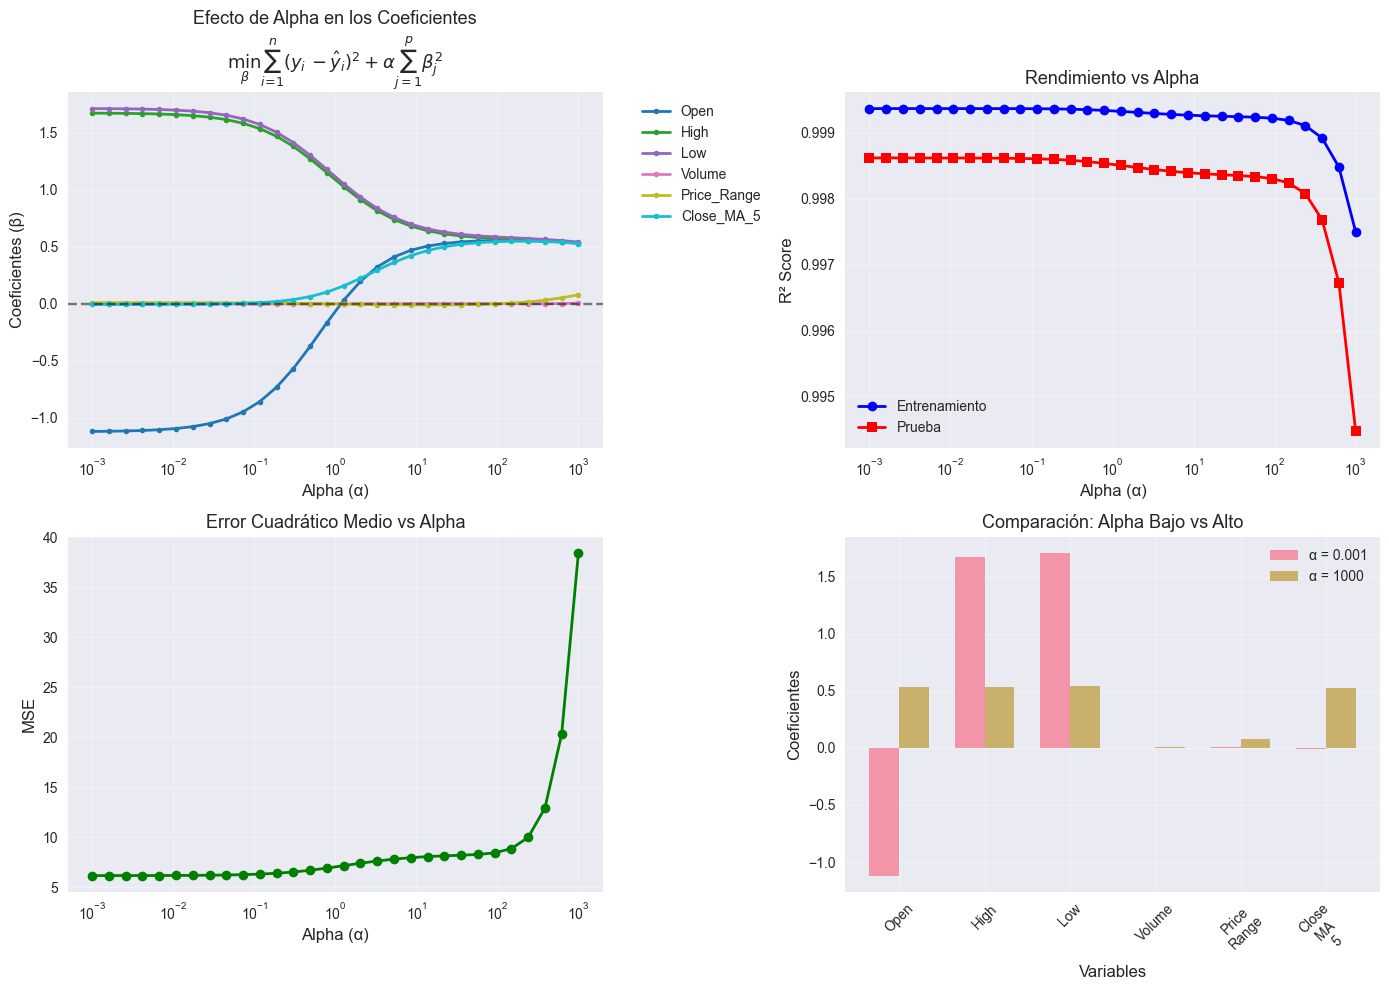

In [37]:
# Gráfico principal: Coeficientes vs Alpha
plt.figure(figsize=(14, 10))

# Subplot 1: Coeficientes vs Alpha
plt.subplot(2, 2, 1)
colors = plt.cm.tab10(np.linspace(0, 1, len(feature_columns)))

for i, (feature, color) in enumerate(zip(feature_columns, colors)):
    coef_values = [coef[i] for coef in coefs_ridge]
    plt.plot(alphas, coef_values, 'o-', label=feature, color=color, linewidth=2, markersize=4)

plt.xscale('log')
plt.xlabel('Alpha (α)', fontsize=12)
plt.ylabel('Coeficientes (β)', fontsize=12)
plt.title('Efecto de Alpha en los Coeficientes\n' + 
          r'$\min_{\beta} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2$', 
          fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Subplot 2: R² vs Alpha
plt.subplot(2, 2, 2)
plt.plot(alphas, r2_train_scores, 'o-', label='Entrenamiento', color='blue', linewidth=2)
plt.plot(alphas, r2_test_scores, 's-', label='Prueba', color='red', linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha (α)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Rendimiento vs Alpha', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: MSE vs Alpha
plt.subplot(2, 2, 3)
plt.plot(alphas, mse_oot_scores, 'o-', color='green', linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha (α)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Error Cuadrático Medio vs Alpha', fontsize=13)
plt.grid(True, alpha=0.3)

# Subplot 4: Comparación de coeficientes extremos
plt.subplot(2, 2, 4)
x_pos = np.arange(len(feature_columns))
width = 0.35

plt.bar(x_pos - width/2, coefs_ridge[0], width, label=f'α = {alphas[0]:.3f}', alpha=0.7)
plt.bar(x_pos + width/2, coefs_ridge[-1], width, label=f'α = {alphas[-1]:.0f}', alpha=0.7)

plt.xlabel('Variables', fontsize=12)
plt.ylabel('Coeficientes', fontsize=12)
plt.title('Comparación: Alpha Bajo vs Alto', fontsize=13)
plt.xticks(x_pos, [f.replace('_', '\n') for f in feature_columns], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### PASO 8: ANÁLISIS DE RESULTADOS

In [38]:
# Encontrar alphas óptimos
best_alpha_idx_r2 = np.argmax(r2_test_scores)
best_alpha_r2 = alphas[best_alpha_idx_r2]

best_alpha_idx_mae = np.argmin(mae_test_scores)
best_alpha_mae = alphas[best_alpha_idx_mae]

best_alpha_idx_oot = np.argmax(r2_oot_scores)
best_alpha_oot = alphas[best_alpha_idx_oot]

print("COMPARACIÓN DE MODELOS (3 CONJUNTOS):")
print(f"{'Modelo':<20} {'Train R²':<10} {'Test R²':<10} {'OOT R²':<10} {'Test MAE':<10} {'OOT MAE':<10}")
print("-" * 80)
print(f"{'Regresión Lineal':<20} {r2_train_lr:<10.4f} {r2_test_lr:<10.4f} {r2_oot_lr:<10.4f} {mae_test_lr:<10.2f} {mae_oot_lr:<10.2f}")
print(f"{'Ridge (R² óptimo)':<20} {r2_train_scores[best_alpha_idx_r2]:<10.4f} {r2_test_scores[best_alpha_idx_r2]:<10.4f} {r2_oot_scores[best_alpha_idx_r2]:<10.4f} {mae_test_scores[best_alpha_idx_r2]:<10.2f} {mae_oot_scores[best_alpha_idx_r2]:<10.2f}")
print(f"{'Ridge (MAE óptimo)':<20} {r2_train_scores[best_alpha_idx_mae]:<10.4f} {r2_test_scores[best_alpha_idx_mae]:<10.4f} {r2_oot_scores[best_alpha_idx_mae]:<10.4f} {mae_test_scores[best_alpha_idx_mae]:<10.2f} {mae_oot_scores[best_alpha_idx_mae]:<10.2f}")
print(f"{'Ridge (OOT óptimo)':<20} {r2_train_scores[best_alpha_idx_oot]:<10.4f} {r2_test_scores[best_alpha_idx_oot]:<10.4f} {r2_oot_scores[best_alpha_idx_oot]:<10.4f} {mae_test_scores[best_alpha_idx_oot]:<10.2f} {mae_oot_scores[best_alpha_idx_oot]:<10.2f}")

print(f"\n🎯 ALPHAS ÓPTIMOS:")
print(f"   Mejor R² en Test: α = {best_alpha_r2:.4f}")
print(f"   Mejor MAE en Test: α = {best_alpha_mae:.4f}")
print(f"   Mejor R² en OOT: α = {best_alpha_oot:.4f}")

# Análisis de estabilidad temporal
print(f"\n📊 ANÁLISIS DE ESTABILIDAD TEMPORAL:")
print(f"   RegLineal - Degradación Test→OOT: {r2_test_lr - r2_oot_lr:.4f} puntos R²")
print(f"   Ridge Óptimo - Degradación Test→OOT: {r2_test_scores[best_alpha_idx_r2] - r2_oot_scores[best_alpha_idx_r2]:.4f} puntos R²")

# Seleccionar modelo final (mejor en OOT por ser más realista)
modelo_final_alpha = best_alpha_oot
modelo_final_idx = best_alpha_idx_oot

print("\nEFECTO DE LA REGULARIZACIÓN:")
print(f"Alpha bajo ({alphas[0]:.3f}) - Coeficientes:")
for i, feature in enumerate(feature_columns):
    print(f"  {feature:<15}: {coefs_ridge[0][i]:8.3f}")

print(f"\nAlpha alto ({alphas[-1]:.0f}) - Coeficientes:")
for i, feature in enumerate(feature_columns):
    print(f"  {feature:<15}: {coefs_ridge[-1][i]:8.3f}")

# Calcular reducción porcentual
reduccion = []
for i in range(len(feature_columns)):
    if abs(coefs_ridge[0][i]) > 1e-10:  # Evitar división por cero
        red = abs((abs(coefs_ridge[-1][i]) - abs(coefs_ridge[0][i])) / abs(coefs_ridge[0][i]) * 100)
        reduccion.append(red)
    else:
        reduccion.append(0)

print(f"\nReducción promedio de coeficientes: {np.mean(reduccion):.1f}%")

COMPARACIÓN DE MODELOS (3 CONJUNTOS):
Modelo               Train R²   Test R²    OOT R²     Test MAE   OOT MAE   
--------------------------------------------------------------------------------
Regresión Lineal     0.9994     0.9986     0.9769     0.54       1.95      
Ridge (R² óptimo)    0.9994     0.9986     0.9769     0.54       1.95      
Ridge (MAE óptimo)   0.9994     0.9986     0.9769     0.54       1.95      
Ridge (OOT óptimo)   0.9994     0.9986     0.9769     0.54       1.95      

🎯 ALPHAS ÓPTIMOS:
   Mejor R² en Test: α = 0.0010
   Mejor MAE en Test: α = 0.0010
   Mejor R² en OOT: α = 0.0010

📊 ANÁLISIS DE ESTABILIDAD TEMPORAL:
   RegLineal - Degradación Test→OOT: 0.0217 puntos R²
   Ridge Óptimo - Degradación Test→OOT: 0.0217 puntos R²

EFECTO DE LA REGULARIZACIÓN:
Alpha bajo (0.001) - Coeficientes:
  Open           :   -1.119
  High           :    1.672
  Low            :    1.712
  Volume         :   -0.002
  Price_Range    :    0.010
  Close_MA_5     :   -0.005

Alph

### PASO 9: MODELO FINAL Y PREDICCIONES

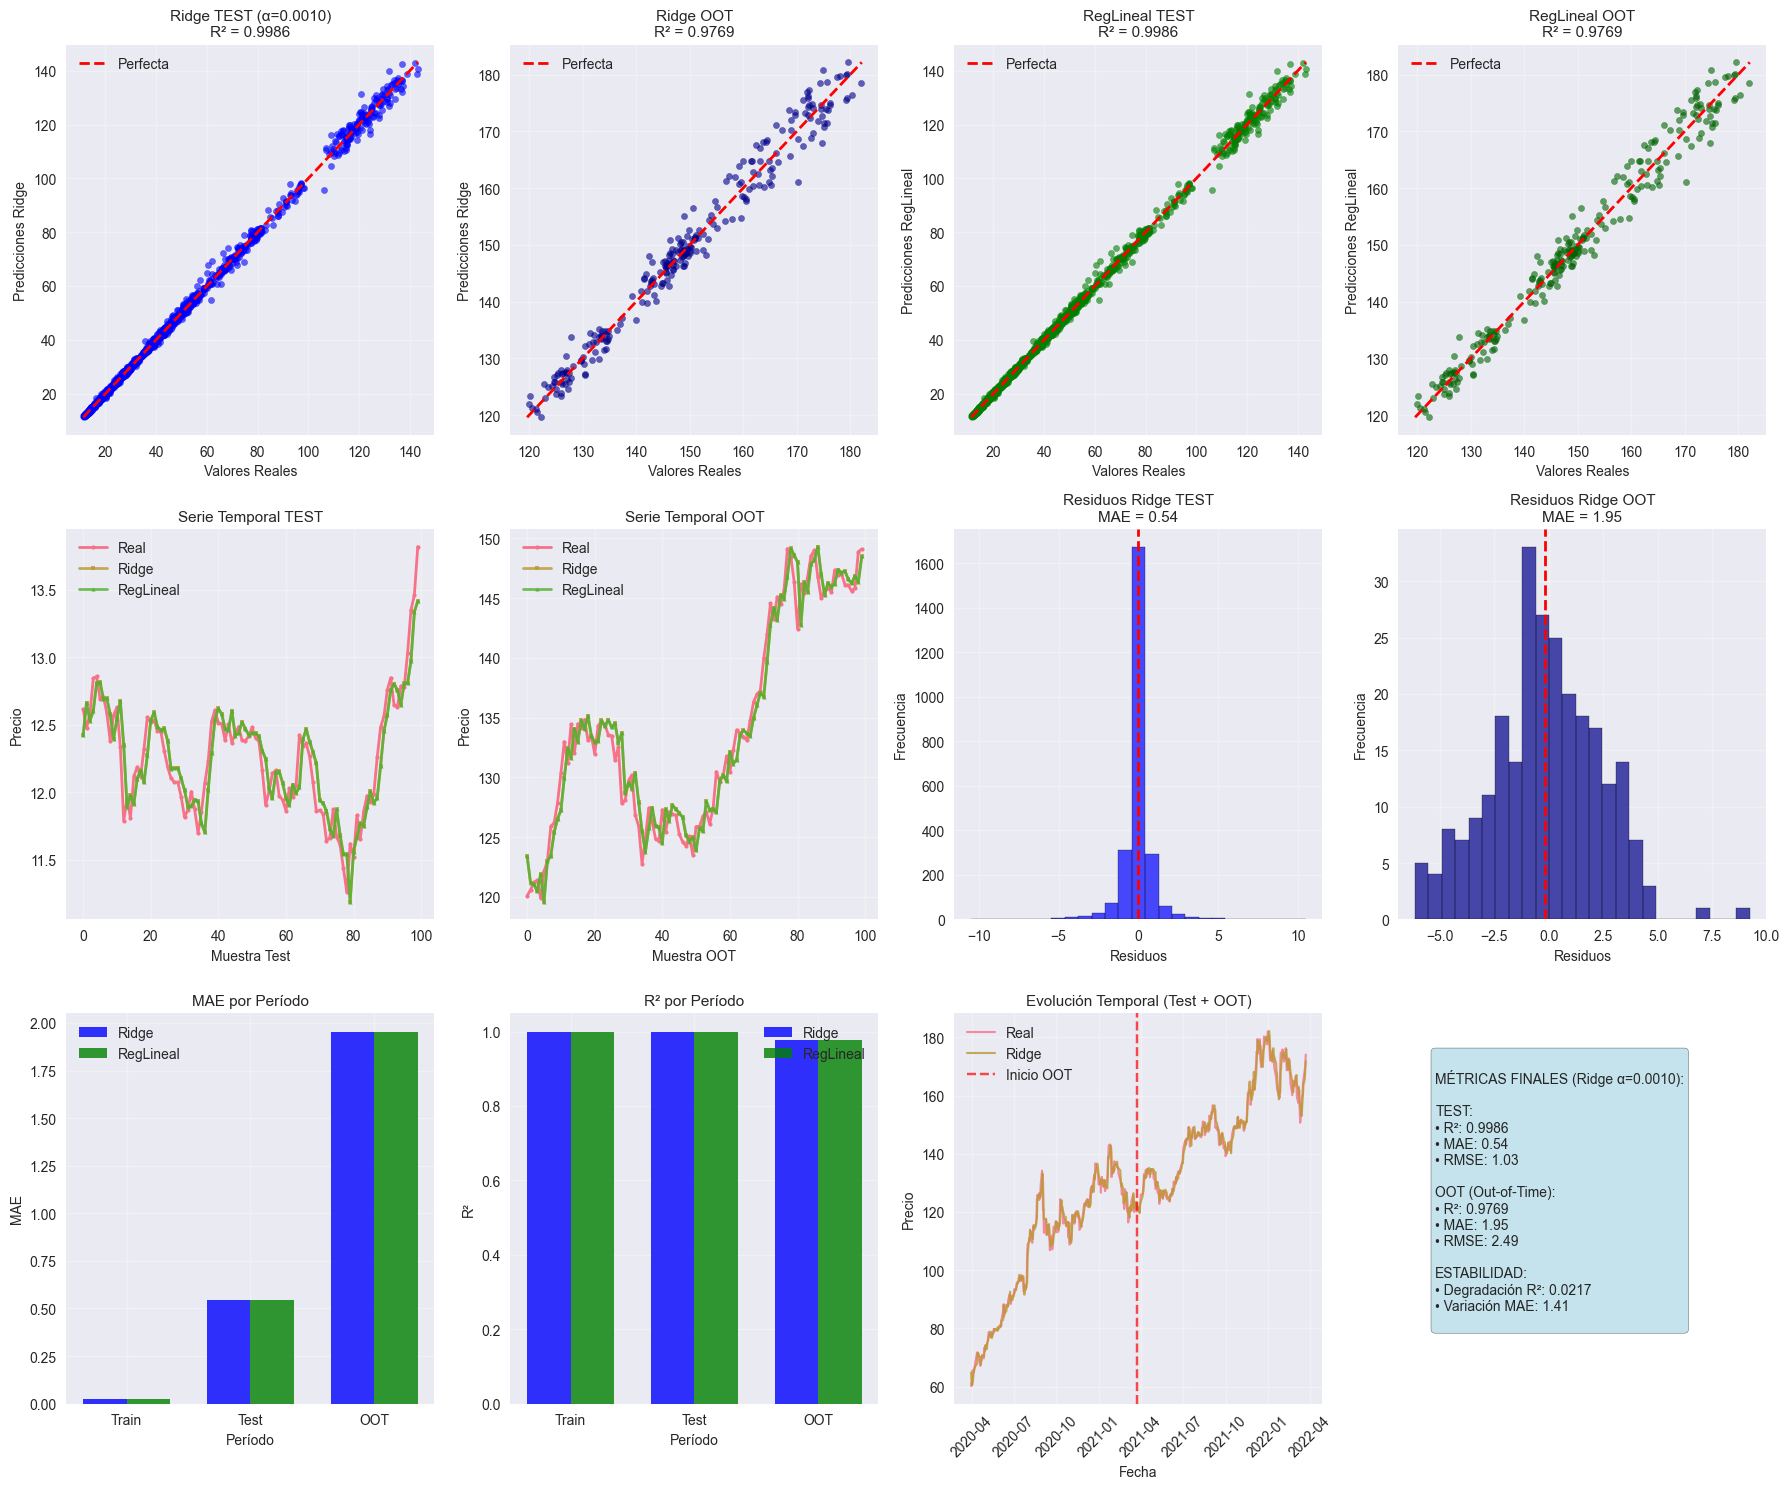

In [39]:

df_test = X_test
df_test['Target'] = y_test
df_test['Date'] =df_train_test['Date'] 

# Entrenar modelos finales para comparación
ridge_final = Ridge(alpha=modelo_final_alpha)
ridge_final.fit(X_train_scaled, y_train)
lr_final = LinearRegression()
lr_final.fit(X_train_scaled, y_train)

# Generar predicciones en los tres conjuntos
y_pred_ridge_train = ridge_final.predict(X_train_scaled)
y_pred_ridge_test = ridge_final.predict(X_test_scaled)
y_pred_ridge_oot = ridge_final.predict(X_oot_scaled)

y_pred_lr_train = lr_final.predict(X_train_scaled)
y_pred_lr_test = lr_final.predict(X_test_scaled)
y_pred_lr_oot = lr_final.predict(X_oot_scaled)

# Crear visualizaciones de predicciones
plt.figure(figsize=(18, 15))

# Subplot 1: Scatter plot Ridge - Test
plt.subplot(3, 4, 1)
plt.scatter(y_test, y_pred_ridge_test, alpha=0.6, color='blue', s=20)
min_val = min(y_test.min(), y_pred_ridge_test.min())
max_val = max(y_test.max(), y_pred_ridge_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfecta')
plt.xlabel('Valores Reales', fontsize=10)
plt.ylabel('Predicciones Ridge', fontsize=10)
plt.title(f'Ridge TEST (α={modelo_final_alpha:.4f})\nR² = {r2_score(y_test, y_pred_ridge_test):.4f}', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Scatter plot Ridge - OOT
plt.subplot(3, 4, 2)
plt.scatter(y_oot, y_pred_ridge_oot, alpha=0.6, color='darkblue', s=20)
min_val_oot = min(y_oot.min(), y_pred_ridge_oot.min())
max_val_oot = max(y_oot.max(), y_pred_ridge_oot.max())
plt.plot([min_val_oot, max_val_oot], [min_val_oot, max_val_oot], 'r--', linewidth=2, label='Perfecta')
plt.xlabel('Valores Reales', fontsize=10)
plt.ylabel('Predicciones Ridge', fontsize=10)
plt.title(f'Ridge OOT\nR² = {r2_score(y_oot, y_pred_ridge_oot):.4f}', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Scatter plot RegLineal - Test
plt.subplot(3, 4, 3)
plt.scatter(y_test, y_pred_lr_test, alpha=0.6, color='green', s=20)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfecta')
plt.xlabel('Valores Reales', fontsize=10)
plt.ylabel('Predicciones RegLineal', fontsize=10)
plt.title(f'RegLineal TEST\nR² = {r2_score(y_test, y_pred_lr_test):.4f}', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: Scatter plot RegLineal - OOT
plt.subplot(3, 4, 4)
plt.scatter(y_oot, y_pred_lr_oot, alpha=0.6, color='darkgreen', s=20)
plt.plot([min_val_oot, max_val_oot], [min_val_oot, max_val_oot], 'r--', linewidth=2, label='Perfecta')
plt.xlabel('Valores Reales', fontsize=10)
plt.ylabel('Predicciones RegLineal', fontsize=10)
plt.title(f'RegLineal OOT\nR² = {r2_score(y_oot, y_pred_lr_oot):.4f}', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Serie temporal Test
plt.subplot(3, 4, 5)
indices_test = np.arange(min(100, len(y_test)))
plt.plot(indices_test, y_test.iloc[indices_test], 'o-', label='Real', linewidth=2, markersize=3)
plt.plot(indices_test, y_pred_ridge_test[indices_test], 's-', label='Ridge', linewidth=2, markersize=3, alpha=0.8)
plt.plot(indices_test, y_pred_lr_test[indices_test], '^-', label='RegLineal', linewidth=2, markersize=3, alpha=0.8)
plt.xlabel('Muestra Test', fontsize=10)
plt.ylabel('Precio', fontsize=10)
plt.title('Serie Temporal TEST', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Serie temporal OOT
plt.subplot(3, 4, 6)
indices_oot = np.arange(min(100, len(y_oot)))
plt.plot(indices_oot, y_oot.iloc[indices_oot], 'o-', label='Real', linewidth=2, markersize=3)
plt.plot(indices_oot, y_pred_ridge_oot[indices_oot], 's-', label='Ridge', linewidth=2, markersize=3, alpha=0.8)
plt.plot(indices_oot, y_pred_lr_oot[indices_oot], '^-', label='RegLineal', linewidth=2, markersize=3, alpha=0.8)
plt.xlabel('Muestra OOT', fontsize=10)
plt.ylabel('Precio', fontsize=10)
plt.title('Serie Temporal OOT', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 7: Histograma residuos Ridge Test
plt.subplot(3, 4, 7)
residuos_ridge_test = y_test - y_pred_ridge_test
plt.hist(residuos_ridge_test, bins=25, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(residuos_ridge_test.mean(), color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuos', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title(f'Residuos Ridge TEST\nMAE = {mean_absolute_error(y_test, y_pred_ridge_test):.2f}', fontsize=11)
plt.grid(True, alpha=0.3)

# Subplot 8: Histograma residuos Ridge OOT
plt.subplot(3, 4, 8)
residuos_ridge_oot = y_oot - y_pred_ridge_oot
plt.hist(residuos_ridge_oot, bins=25, alpha=0.7, color='darkblue', edgecolor='black')
plt.axvline(residuos_ridge_oot.mean(), color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuos', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title(f'Residuos Ridge OOT\nMAE = {mean_absolute_error(y_oot, y_pred_ridge_oot):.2f}', fontsize=11)
plt.grid(True, alpha=0.3)

# Subplot 9: Comparación errores por período
plt.subplot(3, 4, 9)
periodos = ['Train', 'Test', 'OOT']
mae_ridge = [mean_absolute_error(y_train, y_pred_ridge_train),
             mean_absolute_error(y_test, y_pred_ridge_test),
             mean_absolute_error(y_oot, y_pred_ridge_oot)]
mae_lr = [mean_absolute_error(y_train, y_pred_lr_train),
          mean_absolute_error(y_test, y_pred_lr_test),
          mean_absolute_error(y_oot, y_pred_lr_oot)]

x_pos = np.arange(len(periodos))
width = 0.35
plt.bar(x_pos - width/2, mae_ridge, width, label='Ridge', alpha=0.8, color='blue')
plt.bar(x_pos + width/2, mae_lr, width, label='RegLineal', alpha=0.8, color='green')
plt.xlabel('Período', fontsize=10)
plt.ylabel('MAE', fontsize=10)
plt.title('MAE por Período', fontsize=11)
plt.xticks(x_pos, periodos)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 10: R² por período
plt.subplot(3, 4, 10)
r2_ridge = [r2_score(y_train, y_pred_ridge_train),
            r2_score(y_test, y_pred_ridge_test),
            r2_score(y_oot, y_pred_ridge_oot)]
r2_lr = [r2_score(y_train, y_pred_lr_train),
         r2_score(y_test, y_pred_lr_test),
         r2_score(y_oot, y_pred_lr_oot)]

plt.bar(x_pos - width/2, r2_ridge, width, label='Ridge', alpha=0.8, color='blue')
plt.bar(x_pos + width/2, r2_lr, width, label='RegLineal', alpha=0.8, color='green')
plt.xlabel('Período', fontsize=10)
plt.ylabel('R²', fontsize=10)
plt.title('R² por Período', fontsize=11)
plt.xticks(x_pos, periodos)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 11: Evolución temporal completa (últimos 500 puntos)
plt.subplot(3, 4, 11)
# Concatenar los últimos datos para mostrar evolución temporal
if len(df_test) + len(df_oot) > 500:
    start_idx = len(df_test) + len(df_oot) - 500
    fechas_viz = pd.concat([df_test['Date'].iloc[start_idx:], df_oot['Date']])
    reales_viz = pd.concat([y_test.iloc[start_idx:], y_oot])
    ridge_viz = np.concatenate([y_pred_ridge_test[start_idx:], y_pred_ridge_oot])
else:
    fechas_viz = pd.concat([df_test['Date'], df_oot['Date']])
    reales_viz = pd.concat([y_test, y_oot])
    ridge_viz = np.concatenate([y_pred_ridge_test, y_pred_ridge_oot])

plt.plot(fechas_viz, reales_viz, '-', label='Real', linewidth=1.5, alpha=0.8)
plt.plot(fechas_viz, ridge_viz, '-', label='Ridge', linewidth=1.5, alpha=0.8)
plt.axvline(x=df_oot['Date'].iloc[0], color='red', linestyle='--', alpha=0.7, label='Inicio OOT')
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Precio', fontsize=10)
plt.title('Evolución Temporal (Test + OOT)', fontsize=11)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 12: Métricas resumen
plt.subplot(3, 4, 12)
plt.axis('off')
metricas_texto = f"""
MÉTRICAS FINALES (Ridge α={modelo_final_alpha:.4f}):

TEST:
• R²: {r2_score(y_test, y_pred_ridge_test):.4f}
• MAE: {mean_absolute_error(y_test, y_pred_ridge_test):.2f}
• RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)):.2f}

OOT (Out-of-Time):
• R²: {r2_score(y_oot, y_pred_ridge_oot):.4f}
• MAE: {mean_absolute_error(y_oot, y_pred_ridge_oot):.2f}
• RMSE: {np.sqrt(mean_squared_error(y_oot, y_pred_ridge_oot)):.2f}

ESTABILIDAD:
• Degradación R²: {r2_score(y_test, y_pred_ridge_test) - r2_score(y_oot, y_pred_ridge_oot):.4f}
• Variación MAE: {mean_absolute_error(y_oot, y_pred_ridge_oot) - mean_absolute_error(y_test, y_pred_ridge_test):.2f}
"""
plt.text(0.1, 0.9, metricas_texto, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

In [ ]:
print(f"Alpha óptimo: {modelo_final_alpha:.4f}")
print(f"Criterio de selección: Mejor rendimiento en OOT (más realista)")

print("\nCoeficientes del modelo final:")
for i, (feature, coef) in enumerate(zip(feature_columns, ridge_final.coef_)):
    print(f"  {feature:<15}: {coef:8.3f}")

print("\nMÉTRICAS FINALES COMPARATIVAS:")
print(f"{'Modelo':<15} {'Test R²':<10} {'OOT R²':<10} {'Test MAE':<10} {'OOT MAE':<10} {'Estabilidad':<12}")
print("-" * 75)
print(f"{'RegLineal':<15} {r2_score(y_test, y_pred_lr_test):<10.4f} {r2_score(y_oot, y_pred_lr_oot):<10.4f} {mean_absolute_error(y_test, y_pred_lr_test):<10.2f} {mean_absolute_error(y_oot, y_pred_lr_oot):<10.2f} {r2_score(y_test, y_pred_lr_test) - r2_score(y_oot, y_pred_lr_oot):<12.4f}")
print(f"{'Ridge Final':<15} {r2_score(y_test, y_pred_ridge_test):<10.4f} {r2_score(y_oot, y_pred_ridge_oot):<10.4f} {mean_absolute_error(y_test, y_pred_ridge_test):<10.2f} {mean_absolute_error(y_oot, y_pred_ridge_oot):<10.2f} {r2_score(y_test, y_pred_ridge_test) - r2_score(y_oot, y_pred_ridge_oot):<12.4f}")


Alpha óptimo: 0.0010
Criterio de selección: Mejor rendimiento en OOT (más realista)

Coeficientes del modelo final:
  Open           :   -1.119
  High           :    1.672
  Low            :    1.712
  Volume         :   -0.002
  Price_Range    :    0.010
  Close_MA_5     :   -0.005

MÉTRICAS FINALES COMPARATIVAS:
Modelo          Test R²    OOT R²     Test MAE   OOT MAE    Estabilidad 
---------------------------------------------------------------------------
RegLineal       0.9986     0.9769     0.54       1.95       0.0217      
Ridge Final     0.9986     0.9769     0.54       1.95       0.0217      


In [ ]:
# Entrenar modelo final con alpha óptimo
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train_scaled, y_train)

# Predicciones finales
y_pred_final = ridge_final.predict(X_test_scaled)

print("MODELO RIDGE FINAL:")
print(f"Alpha seleccionado: {best_alpha:.4f}")
print(f"R² en prueba: {r2_score(y_test, y_pred_final):.4f}")
print(f"MSE en prueba: {mean_squared_error(y_test, y_pred_final):.2f}")

print("\nCoeficientes del modelo final:")
for i, (feature, coef) in enumerate(zip(feature_columns, ridge_final.coef_)):
    print(f"  {feature:<15}: {coef:8.3f}")

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETO TERMINADO")
print("="*80)

print("\n🔍 CONCLUSIONES:")
print("1. Ridge Regression reduce el sobreajuste mediante la regularización")
print("2. A mayor alpha, menores son los coeficientes (efecto shrinkage)")
print("3. El alpha óptimo equilibra sesgo y varianza")
print("4. La regularización mejora la generalización del modelo")

MODELO RIDGE FINAL:
Alpha seleccionado: 0.0010
R² en prueba: 0.9986
MSE en prueba: 1.06

Coeficientes del modelo final:
  Open           :   -1.119
  High           :    1.672
  Low            :    1.712
  Volume         :   -0.002
  Price_Range    :    0.010
  Close_MA_5     :   -0.005

✅ ANÁLISIS COMPLETO TERMINADO

🔍 CONCLUSIONES:
1. Ridge Regression reduce el sobreajuste mediante la regularización
2. A mayor alpha, menores son los coeficientes (efecto shrinkage)
3. El alpha óptimo equilibra sesgo y varianza
4. La regularización mejora la generalización del modelo
